#                      Forest Fires In Brazil

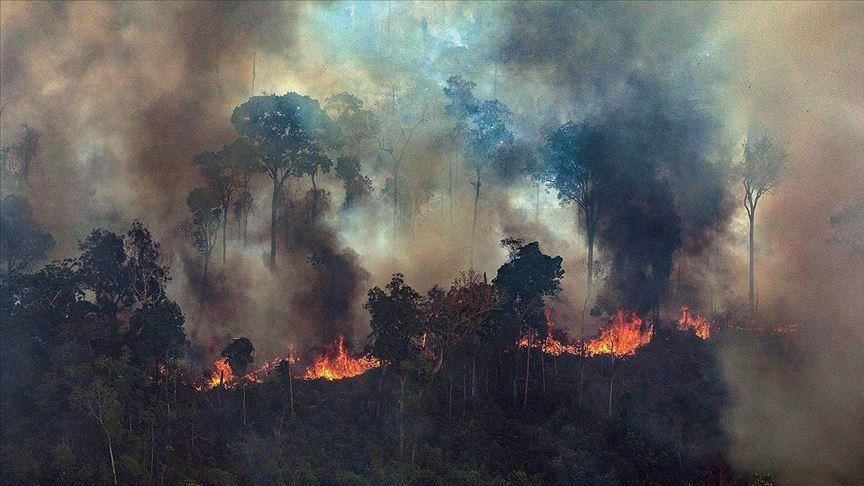

> The Amazon rainforest is the world's largest tropical forest. It's an area with torrential rain that almost never burns 
 on its own, yet the blazes have burned for more than two weeks, growing so intense that they sent smoke all the way
 to São Paulo, Brazil's largest city.

> Forest fires are a serious problem for the preservation of the Tropical Forests. Understanding the frequency of forest fires in a time series that can help to take action to prevent them. Brazil has the largest rainforest on the planet that is the amazon rainforest.

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.pyplot import MaxNLocator, FuncFormatter

## Lets look at our Data

In [ ]:
data = pd.read_csv("/kaggle/input/forest-fires-in-brazil/amazon.csv",encoding="ISO-8859-1")
data.head(10)

In [ ]:
#dropping date column
data.drop(['date'],axis=1,inplace=True)
data.head()

We are dropping date column  as its not giving any information about the data

### Understanding Data

In [ ]:
#shape fo the data
print('Shape of the Data:')
data.shape

There are 4 columns and 6454 number of rows.

In [ ]:
#checking for data types.
data.dtypes

* 'Year' and 'number' are numerical cloumns.
* State and month are categorical columns.

In [ ]:
data['year'].unique()

So here we can see that , it exists from 1998 to 2017 (for 19 years)

In [ ]:
#checking for number of states
data['state'].unique()

In [ ]:
data['month'].unique()

This is in "Portuguese" language, so we can convert it into English.

In [ ]:
month_map={'Janeiro':'January', 'Fevereiro':'February', 'Março':'March', 'Abril':'April', 'Maio':'May', 'Junho':'June', 'Julho':'July',
       'Agosto':'August', 'Setembro':'September', 'Outubro':'October', 'Novembro':'November', 'Dezembro':'December'}
data['month']=data['month'].map(month_map)

In [ ]:
#checking for number of months
data['month'].unique()

In [ ]:
#information about the data
print('Information of the Data:- ')
data.info()

In [ ]:
#checking for null values
data.isnull().sum()

> There are no null values

In [ ]:
#checking how many  fires were reported in 19 years
print('Number of fires  were reported in 19 years:',data['number'].sum())


In [ ]:
#Each year how many fires were reported
table = pd.pivot_table(data,values="number",index=["year"],aggfunc=np.sum)
table


### Let's look at the trend  in brazil of fires as per 'Year' , 'Month' and  'statewise' 

In [ ]:
#checking yearwise Trend


plt.figure(figsize = (15,10))
plot = sns.lineplot(data = data, x = 'year', y = 'number', markers = True)
plot.xaxis.set_major_locator(plt.MaxNLocator(19))
plt.title('Yearwise Trend')
plot.set_xlim(1998, 2017)


* We can see that in year 2003 have the highest number of burns and then followed by 2016.
* In 1998,it was the lowest number of fires among all the 19 years.

In [ ]:
#checking monthwise trend
plt.figure(figsize=(15,7))
sns.boxplot(x='month',y='number',data=data[['month','number']])
plt.title('Month Wise Trend')
plt.show()

* "July" have  the most number of fires.
* Then followed by "October" & "November".
* We can see that "February","March" & "April" have the lowest number of fires.

In [ ]:
#checking statewise trend
plt.figure(figsize=(20,10))
st=sns.boxenplot(x='state',y='number',data=data[['state','number']])
st.set_xticklabels(st.get_xticklabels(), rotation=45)
plt.title('State Wise Trend')
plt.show()

* Sao Paulo (as sao paulo is the largest city in brazil) have the highest number of fires and then followed by Mato Grosso and Bahia.
* Distrito Federal,Sergipe,Alagoas and Sergipe Santo have lowest number of fires among all states.